# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
!hostname -f

dcwipphhgc001.edc.nam.gm.com


In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = "/home/qz40qq/trafficSignData/train.p"
validation_file= "/home/qz40qq/trafficSignData/valid.p"
testing_file =  "/home/qz40qq/trafficSignData/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)


# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

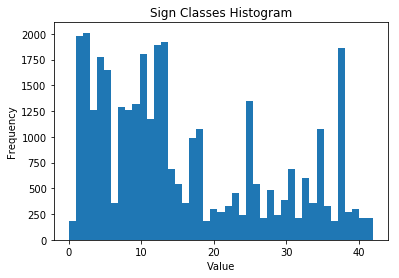

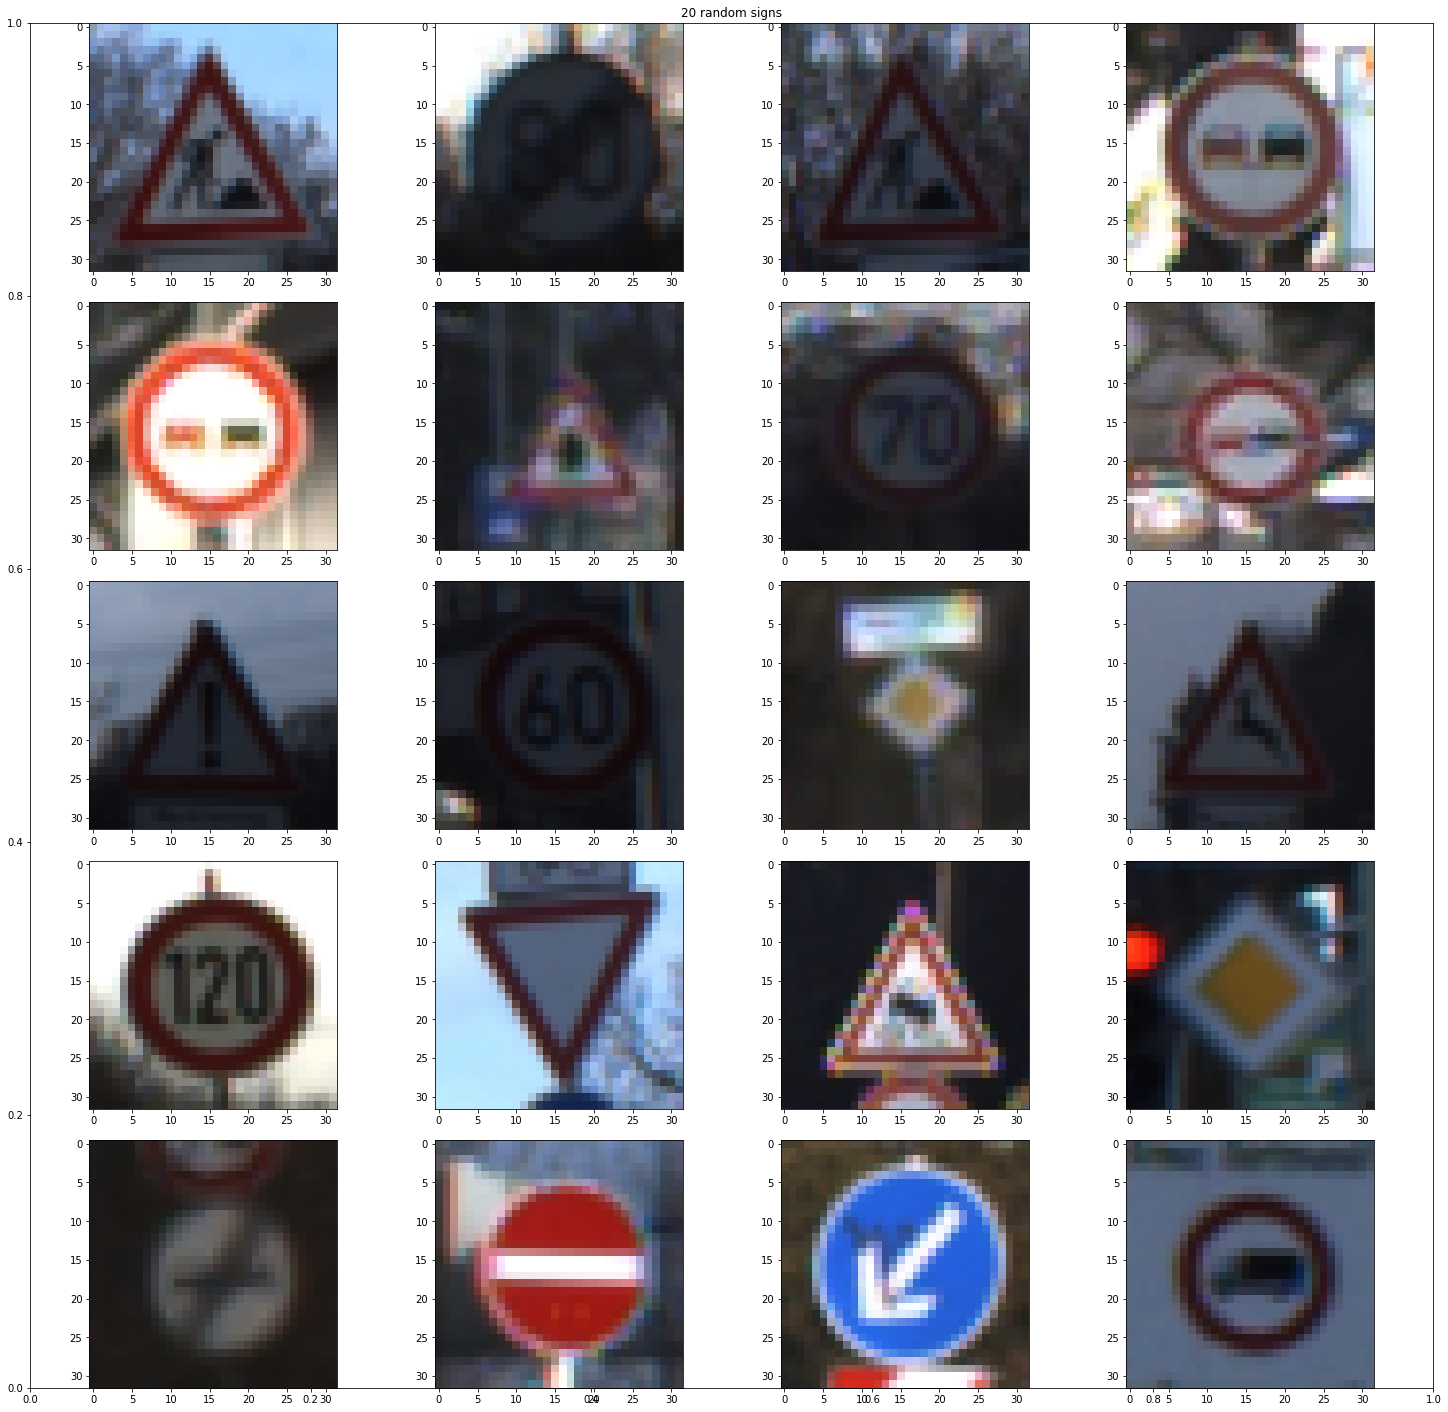

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mimage
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline


######################################################
### Traffic sign class distribution
######################################################
plt.hist(y_train, bins=n_classes, linewidth=2.0)

plt.title("Sign Classes Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()
plt.show()


######################################################
### Plot random traffic signs for exploration
######################################################
def plotImageGrid(imgList, gridSize=10): 
    rowNum = 5
    if (gridSize % rowNum) > 0:
        raise ValueError("gridSize must be multiple of {}".format(rowNum))
        
    fig = plt.figure(figsize=(20, 20))
    plt.title("{} random signs".format(gridSize))
    i=0
    while i < gridSize:
        i = i+1
        index = random.randint(0, len(imgList))
        image = imgList[index].squeeze()
        sub1 = fig.add_subplot(rowNum, gridSize/rowNum, i)
        sub1.imshow(image)

    fig.tight_layout()
    plt.show()

# for d in X_train:
#     if (d.dtype != "uint8"):
#         print("Found")

       
plotImageGrid(X_train, 20)

The plot above shows 20 random signs on a grid as well as a histogram of number of signs per class. We can see that there the number of elements per class is significantly different and that resulted in problems for accuracy before augmenting the dataset.

# Image transformation tests

5
Speed limit (80km/h)


/home/qz40qq/miniconda2/envs/experiments/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
/home/qz40qq/miniconda2/envs/experiments/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


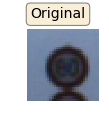

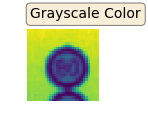

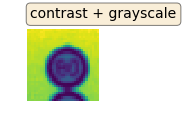

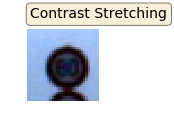

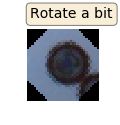

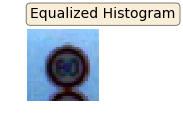

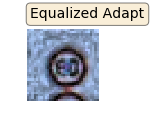

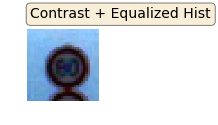

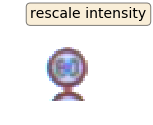

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Import Pillow:
from PIL import Image
from skimage import data, img_as_float
from skimage import exposure
from skimage import color
import csv

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

def randomAngle():
    return random.choice([-45,45])

def PIL2array(img):
    return numpy.array(img.getdata(),
                    numpy.uint8).reshape(img.size[1], img.size[0], 3)

def rotateImageRandomAngle(image):
    # img2.save("img2.jpg")
    img = Image.fromarray(np.uint8(image))
    img = img.rotate(randomAngle())
    return np.array(img, dtype=np.uint8)

def contrastStretching(image):
    # Contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))
    
    return img_rescale

def equalizeHist(image):
    image = exposure.equalize_hist(image)
    return image

def equalizeAdapt(image):
    image = exposure.equalize_adapthist(image, clip_limit=0.03)
    return image

def rescaleIntensity(image):
    return exposure.rescale_intensity(image, in_range=(0,75))

def grayscale(image): 
    from skimage.color import rgb2gray
    return rgb2gray(image)

def plotAndShowImageWithLabel(image, label="", size = (1,1)):
#     plt.subplots(1)
    fig = plt.figure(figsize=size)
#     plt.title(label)
    ax = fig.add_axes([0,0,1,1])
#     ax2 = fig.add_axes([1,1,0,0])
#     ax.text(left, bottom, '',
#         horizontalalignment='left',
#         verticalalignment='top',
#         transform=ax.transAxes)
#     plt.text(0.5, 1.08, label,
#          horizontalalignment='center',
#          fontsize=20,
#          transform = ax.transAxes)

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.05, 1.30, label, transform=ax.transAxes, fontsize=14,
        verticalalignment='top',  bbox=props)
    
    plt.axis('off')
    plt.imshow(image)


# load class sign names from CSV    
signNames=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signNames.append((row['SignName']))    

def signClassForId(index):
    return signNames[index]
            
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()


plotAndShowImageWithLabel(image,'Original')

plotAndShowImageWithLabel(color.rgb2gray(image), 'Grayscale Color')

# plotAndShowImageWithLabel(equalizeAdapt(rgb2gray(image).astype(np.float32)), "Adapt RGB2Gray Grayscale")

plotAndShowImageWithLabel(grayscale(contrastStretching(image)), 'contrast + grayscale')

plotAndShowImageWithLabel(contrastStretching(image), 'Contrast Stretching')

plotAndShowImageWithLabel(rotateImageRandomAngle(image), 'Rotate a bit')

plotAndShowImageWithLabel(equalizeHist(image), 'Equalized Histogram')

plotAndShowImageWithLabel(equalizeAdapt(image),  'Equalized Adapt')

plotAndShowImageWithLabel(equalizeHist(contrastStretching(image)), 'Contrast + Equalized Hist')

plotAndShowImageWithLabel(rescaleIntensity(image), 'rescale intensity')

print(y_train[index])
print(signClassForId(y_train[index].astype(int)))

# Comments about image transforms

Contrast stretching seems to produce good results for most images but equalizations of the histograms and adaptative equalizations seems like "hit or miss" - In some cases it's great, but in others the results are not ideal. 

The trick to rotate a bit the image to produce more data for training is interesting but I'm concerned about real life applications, given that some traffic signs can be misinterpreted. A confusion matrix could show this results and if I do have time I'd explore it.  After more research, Keras Image Generator proved to be a better candidate for this task not only doing rotations but providing distortions.

Based on some experimentation and the results I've seen, I'm selecting the **equalization of histograms** based performance (much faster than adaptative and some other methods) and it did provided good results. The documentation about the method explains that it produces good results for over or under-exposed images, which seems to be the case with the dataset provided. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from skimage import exposure
from tqdm import tqdm

X_train, y_train = shuffle(X_train, y_train)

def normalizeImages(imgList, labelList=None):
    tf_image = []
    tf_label = []
    n_elem = len(imgList)
    
    print ("Size of original image list {}".format(n_elem))
    
    for i in tqdm(range(n_elem)):
#         img = equalizeAdapt(grayscale(imgList[i]).astype(np.float32)) # equalizeHist(imgList[i])
        img = equalizeHist(imgList[i])
        tf_image.append(img)
        if labelList.size:
            tf_label.append(labelList[i])

# too slow, list append is faster
#        tf_image = np.append(tf_image, img) #.append(img)
#        tf_label = np.append(tf_label, labelList[i])

        
    tf_image = np.array(tf_image) #np.array(tf_image, dtype=np.uint8)
    tf_label = np.array(tf_label)
       
    print("Size of images {}".format(len(tf_image)))
    print("Size of labels {}".format(len(tf_label)))
    
    return tf_image, tf_label


print('Normalizing Training Images...')
X_train, y_train = normalizeImages(X_train, y_train)
    
print('Normalizing Test Images...')
X_test, y_test = normalizeImages(X_test, y_test)

# shuffling 
X_train, y_train = shuffle(X_train, y_train)


from sklearn.model_selection import train_test_split

## Spliting Training Data in Training, Validation, Test
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X_train,
    y_train,
    test_size=0.30,
    stratify=y_train
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_val_test,
    y_val_test,
    test_size=0.30,
    stratify=y_val_test
)


  0%|          | 0/34799 [00:00<?, ?it/s]/home/qz40qq/miniconda2/envs/experiments/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
  2%|▏         | 571/34799 [00:00<00:06, 5701.58it/s]

Normalizing Training Images...
Size of original image list 34799


  5%|▌         | 680/12630 [00:00<00:01, 6799.44it/s]

Size of images 34799
Size of labels 34799
Normalizing Test Images...
Size of original image list 12630


100%|██████████| 12630/12630 [00:02<00:00, 6175.34it/s]


Size of images 12630
Size of labels 12630


# Question 1

Describe the techniques used to preprocess the data.

**Answer:**

I am normalizing the images using equalization of histograms based on my experiments and the comments described on the image processing section above. I've experimented with a few different methods before and it provided the best results and trade-of for performance as well.  

I've also splitted the training set to generate a validation set from here. In fact, this took me a long time to realize that I was missing given that I was assuming that the dataset provided [1] for validation was good enough, but I'd need to also do the same kind of normalization there as well.  

[1] validation_file= "/home/qz40qq/trafficSignData/valid.p"

In [7]:
##  Reference: 
## * http://machinelearningmastery.com/image-augmentation-deep-learning-keras/

from keras.preprocessing.image import ImageDataGenerator

n_images = 3000
X_train_augmented = np.empty((0,32,32,3))
y_train_augmented = np.empty(0,dtype='float32')

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=6,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    vertical_flip=False,
    horizontal_flip=False
)

datagen.fit(X_train)

# print items per class (histogram wasn't specific enough IMO)
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

Using TensorFlow backend.


{0: 126,
 1: 1386,
 2: 1407,
 3: 882,
 4: 1239,
 5: 1155,
 6: 252,
 7: 903,
 8: 882,
 9: 924,
 10: 1260,
 11: 819,
 12: 1323,
 13: 1344,
 14: 483,
 15: 378,
 16: 252,
 17: 693,
 18: 756,
 19: 126,
 20: 210,
 21: 189,
 22: 231,
 23: 315,
 24: 168,
 25: 945,
 26: 378,
 27: 147,
 28: 336,
 29: 168,
 30: 273,
 31: 483,
 32: 147,
 33: 419,
 34: 252,
 35: 756,
 36: 231,
 37: 126,
 38: 1302,
 39: 189,
 40: 210,
 41: 147,
 42: 147}

In [8]:
from tqdm import tqdm
# progress for each class
for i in tqdm(range(n_classes)):

        index = [y_train==i]
        y_i_class = y_train[index]
        img_for_class = X_train[index]
        X_train_augmented_i = np.copy(img_for_class)
        y_train_augmented_i = np.copy(y_i_class)

        for X,y in datagen.flow(img_for_class, y_i_class, batch_size=len(y_i_class)):            
            X_train_augmented_i = np.append(X_train_augmented_i, X, axis=0)
            y_train_augmented_i = np.append(y_train_augmented_i, y, axis=0)
            
            if len(X_train_augmented_i) >= n_images:
                break

        X_train_augmented = np.append(X_train_augmented, X_train_augmented_i[:n_images], axis=0)
        y_train_augmented = np.append(y_train_augmented, y_train_augmented_i[:n_images], axis=0)  

# for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=10):
#     unique, counts = np.unique(y_train, return_counts=True)
#     if (counts[0] >= n_images):
#         break

#     for i in range(0, 5):
#         tf_image.append(X_batch[i])
#         tf_label.append(y_batch[i])

X_train = X_train_augmented
y_train = y_train_augmented

100%|██████████| 43/43 [01:04<00:00,  2.10s/it]


In [9]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

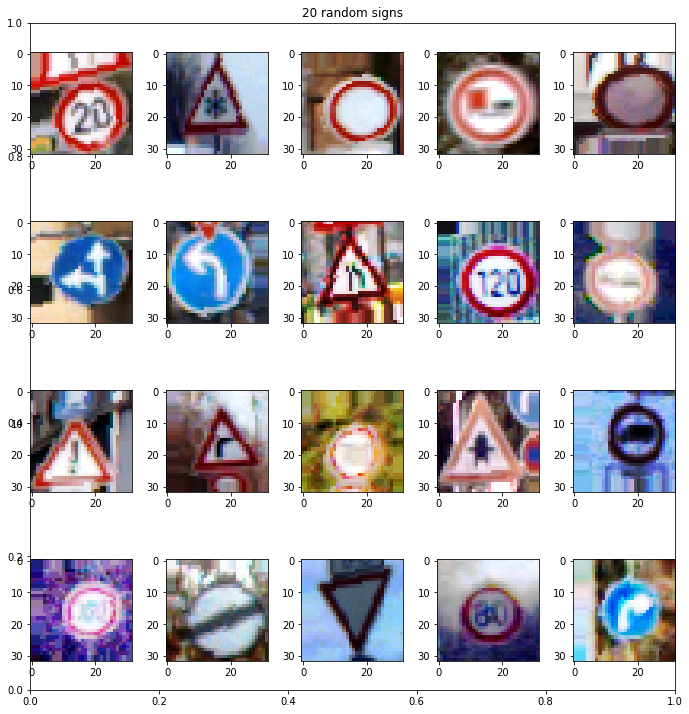

In [10]:
######################################################
### 20 random signs after image transformations
######################################################
fig = plt.figure(figsize=(10, 10))
plt.title("20 random signs")
i=0
while i < 20:
    i = i+1
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    sub1 = fig.add_subplot(4, 5, i)
    sub1.imshow(image)

fig.tight_layout()
plt.show()

# Question 2

Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?

**Answer:**

Training and test data were already provided and I did used the provided validation data as well but turns out it wasn't good enough. So then I've splited the training data with validation as well (30%). 

The usual processing applied on the LeNet solution lab was applied here as well, like shuffling. 

As explained before, given how unever the number of elements on classes of the provided dataset, without data augmentation I was getting wrong predictions on signs that had few examples for training.  I've tried rotation and a combination of the methods provided on this notebook but I've could only achieve a better accuracy when I've used the Keras method, which was easier and cleaner than manually doing those transformations as part of the normalization process, which I've also attempted but the code was becoming overly complex. 

After applying the augmentation technique, I've shuffled the data again and ploted another grid to visualize the results


Image Shape: (32, 32, 3)

Training Set:   129000 samples
Validation Set: 7308 samples
Test Set:       3132 samples


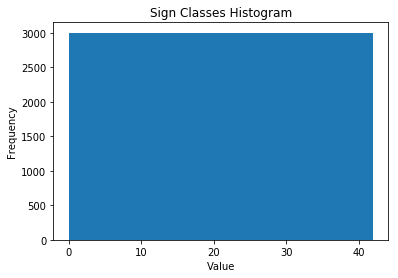

In [11]:
# Ensure test, training and validation sets are still good

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

plt.hist(y_train, bins=n_classes, linewidth=2.0)

plt.title("Sign Classes Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()
plt.show()

### Model Architecture  (LeNet-5 + dropouts)

In [12]:
from tensorflow.contrib.layers import flatten

keep_prob_conv = 0.8 #tf.placeholder(tf.float32)
keep_prob = 0.8 #tf.placeholder(tf.float32)0.7
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
#########################################################################################    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma), name="conv1_W")
    conv1_b = tf.Variable(tf.zeros(6), name="conv1_b")
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')
    conv1   = tf.nn.bias_add(conv1, conv1_b)


    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
#     conv1 = tf.nn.dropout(conv1, keep_prob)
#####################################################################################    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="conv2_W")
    conv2_b = tf.Variable(tf.zeros(16), name="conv2_b")
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID')
    conv2   = tf.nn.bias_add(conv2, conv2_b)
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     conv2 = tf.nn.dropout(conv2, keep_prob)
#########################################################################################    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name="fc1_W")
    fc1_b = tf.Variable(tf.zeros(120), name="fc1_b")
    fc1   = tf.matmul(fc0, fc1_W) 
    fc1   = tf.nn.bias_add(fc1, fc1_b)
    
    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)
#     fc1 = tf.nn.dropout(fc1, keep_prob)
#########################################################################################
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name="fc2_W")
    fc2_b  = tf.Variable(tf.zeros(84), name="fc2_b")
    fc2    = tf.matmul(fc1, fc2_W)
    fc2   = tf.nn.bias_add(fc2, fc2_b)
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
#     fc2 = tf.nn.dropout(fc2, keep_prob)
#########################################################################################    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma), name="fc3_W")
    fc3_b  = tf.Variable(tf.zeros(43), name="fc3_b")
    logits = tf.matmul(fc2, fc3_W)
    logits = tf.nn.bias_add(logits, fc3_b)
    
    return logits

In [13]:
import tensorflow as tf

rate = 0.001
BATCH_SIZE = 128
EPOCHS = 50

x = tf.placeholder(tf.float32, (None, 32, 32, 3), name="placeHolder_x")
y = tf.placeholder(tf.int32, (None), name="placeHolder_y")
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


# Question 3

What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) For reference on how to build a deep neural network using TensorFlow, see Deep Neural Network in TensorFlow from the classroom.

**Answer:**

I've used LeNet5 architecture, which consists on a 5 layer CNN with the following layers:


| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution       	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 					|
| Convolution   	    | outputs 10x10x16, valid padding, 1x1 stride   |
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16					|
| Flatten				| input 5x5x16, outputs 400 (1D instead of 3d)	|
| Fully connected  	    | outputs 120									|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16					|
| Fully connected  	    | outputs 84									|
| RELU					|												|
| Fully connected  	    | Logits, outputs 10							|
 

I've experimented adding dropout (0.9 and 0.5) to some and all layers but that caused the training to be slow and limited the model performance to 94~95%, so I've removed since pure LeNet + normalization and data augmentation produced better results.

# Model Evaluation

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    writer = tf.summary.FileWriter("/tmp/user/trafficSign/")

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))

        print("Training Accuracy = {:.3f}".format(training_accuracy))
        tf.summary.histogram('training_acc', training_accuracy)
#         training_scalar = tf.summary.scalar('training_accuracy', tf.Variable(training_accuracy))
#         writer.add_summary(training_scalar, i)
       
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
#         validation_scalar = tf.summary.scalar('validation_accuracy', tf.Variable(validation_accuracy))
       
#         writer.add_summary(validation_scalar, i)
        print()
        
        
    writer.add_graph(sess.graph)    
#     writer.add_graph(sess.graph)    
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.794
Validation Accuracy = 0.865

EPOCH 2 ...
Training Accuracy = 0.881
Validation Accuracy = 0.914

EPOCH 3 ...
Training Accuracy = 0.919
Validation Accuracy = 0.948

EPOCH 4 ...
Training Accuracy = 0.928
Validation Accuracy = 0.949

EPOCH 5 ...
Training Accuracy = 0.948
Validation Accuracy = 0.966

EPOCH 6 ...
Training Accuracy = 0.953
Validation Accuracy = 0.964

EPOCH 7 ...
Training Accuracy = 0.964
Validation Accuracy = 0.968

EPOCH 8 ...
Training Accuracy = 0.974
Validation Accuracy = 0.978

EPOCH 9 ...
Training Accuracy = 0.977
Validation Accuracy = 0.983

EPOCH 10 ...
Training Accuracy = 0.978
Validation Accuracy = 0.983

EPOCH 11 ...
Training Accuracy = 0.983
Validation Accuracy = 0.984

EPOCH 12 ...
Training Accuracy = 0.986
Validation Accuracy = 0.984

EPOCH 13 ...
Training Accuracy = 0.986
Validation Accuracy = 0.985

EPOCH 14 ...
Training Accuracy = 0.979
Validation Accuracy = 0.982

EPOCH 15 ...
Training Accuracy = 0.986
Valid

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.990


# Question 4

How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)

**Answer:**

Params:

* Rate = 0.001
* BATCH_SIZE = 128
* EPOCHS = 20
* Optimiser = AdamOptimizer
* Padding = VALID

Some of the values were simply reused from the LeNet lab and proved to be good after experimentation.  I've changed those values and experimented a few different combinations but settled for these.  The number of EPOCHS was affected by dropout (when used in some experiments) and by data augmentation. 


# Question 5

What approach did you take in coming up with a solution to this problem?

**Answer:**

* At first, I've ported the LeNet-5 lab solution to work with the traffic signs.  
* Then started exploring different image manipulation techniques, as presented in the beginning of the notebook. Since I'm fairly new to CV, I've plotted all transforms and explored many methods available in scikit-image.
    * This improved the model accuracy but still not enough to reach the 93% requirement and during manual tests the predictions were fairly inaccurate for signs that contained less samples. After discussions on the slack channel of the program I found about Keras Image Generator and modified examples found on blogs (references on the code) to generate more signs and "balance" the number of samples per class.  This was enough to produce the results presented here (96-97%).

* In between I've explored modifying the architecture of the network, adding dropout, add/remove maxpool, removing and adding layers but often producing results within 89~92% of accuracy. Cleaning up the code and staying with LeNet5 and more samples (3000 per class) the model is 97% accurate in 10 epochs, which is really good.

* After looking at the loss of several runs, I've settled with 20 EPOCHs.  I've also started exploring TensorBoard to see the loss, etc.. This was a very interesting exercise.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

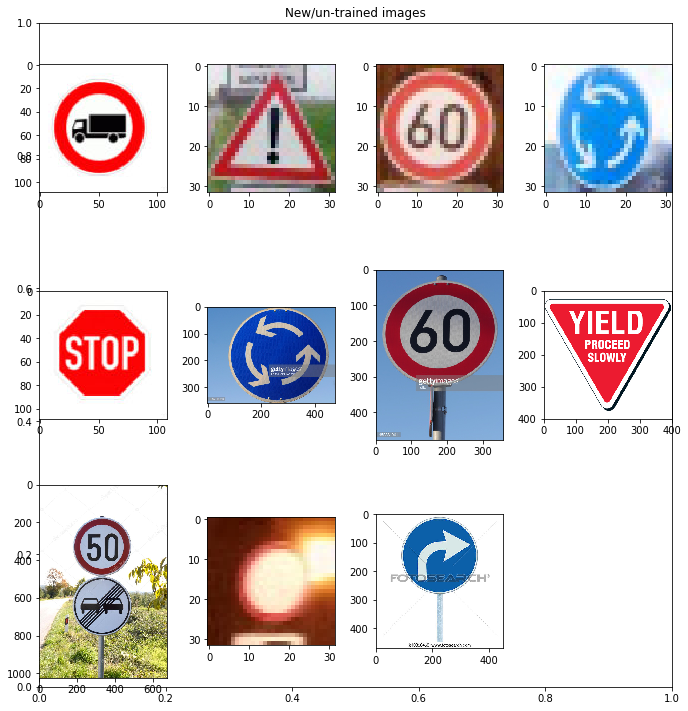

(32, 32, 3)


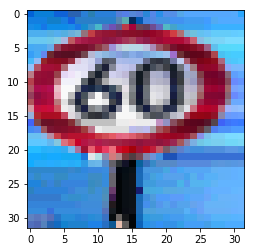

In [17]:
import matplotlib.image as mpimg
import cv2 
import os, sys
import numpy as np
from PIL import Image
import warnings
from skimage import exposure
# jpgfile = Image.open("picture.jpg")
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
pos=0

fig = plt.figure(figsize=(10, 10))
plt.title("New/un-trained images")

for file in os.listdir('extra'):
    if file.endswith(".jpg"):
        pos += 1
        image = mpimg.imread('extra/' + file)
        sub1 = fig.add_subplot(3, 4, pos)
        sub1.imshow(image)

fig.tight_layout()
plt.show()

def resize(img, size = (32,32)): 
    return cv2.resize(img, size, interpolation = cv2.INTER_AREA) 

def normalized_image(image_data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        image_data = np.array([exposure.equalize_hist(image) for image in image_data])
        return image_data

# test processing single image 
singleTestImage = mpimg.imread('extra/60-good.jpg')

# cropping could be used
singleTestImage = singleTestImage[0:500,25:500,:] 
singleTestImage = resize(singleTestImage)
plt.imshow(singleTestImage) 

# plot image after normalization
singleTestImage = normalized_image(singleTestImage)
plt.imshow(singleTestImage) 

print(singleTestImage.shape)





# Question 6 

Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

** Answer**

I've downloaded a few random images with very different qualities, file types, sizes and resolution. This makes the normalization processing a bit more challenging given variation. I will simply apply the same method applied before on this exercise but on real world the normalization would need to be different per image according to specific needs after analysis. 

### Predict the Sign Type for Each Image  (normalized)

INFO:tensorflow:Restoring parameters from ./lenet
[16 18  2 40 14 40  3 13 40 13 18]


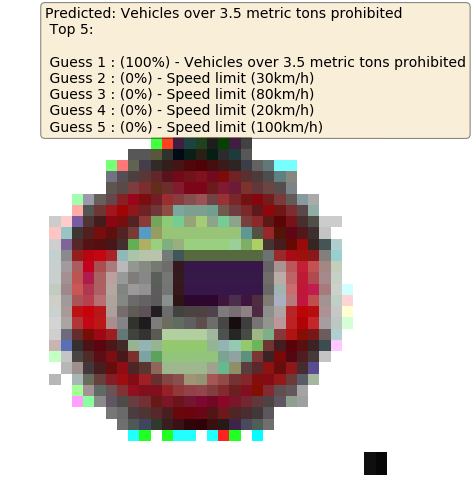

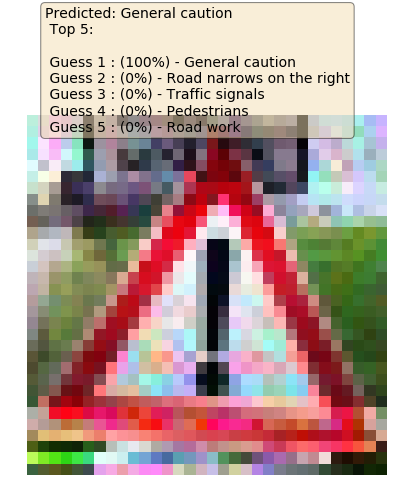

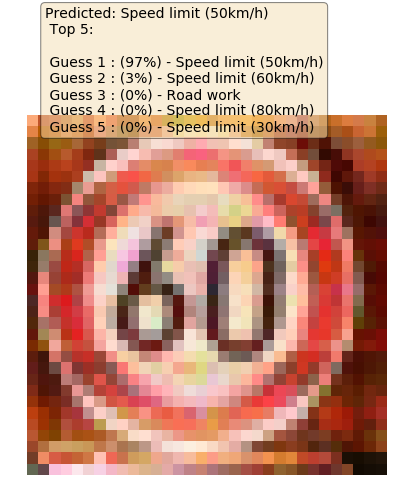

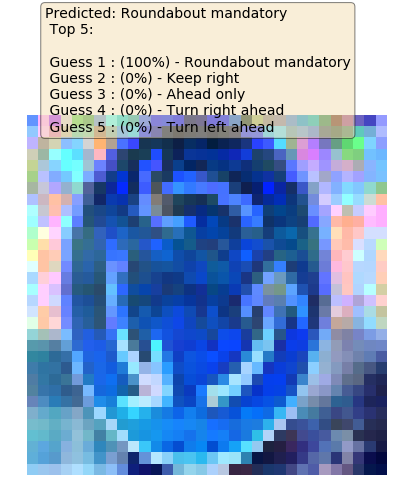

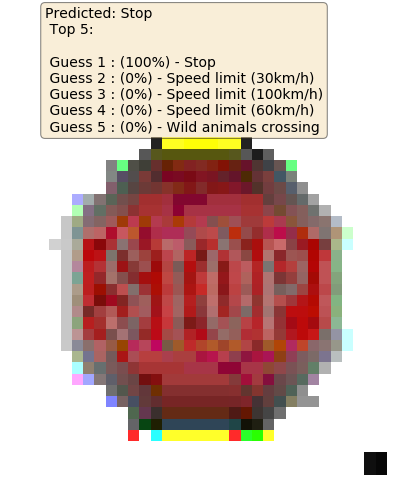

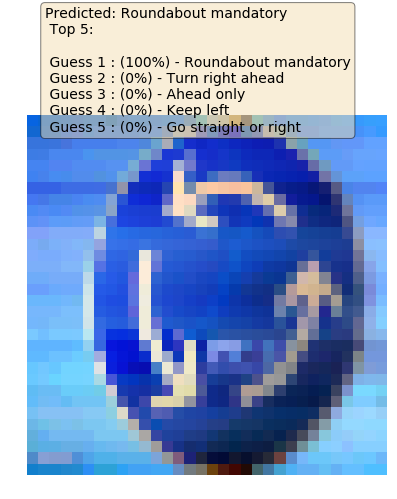

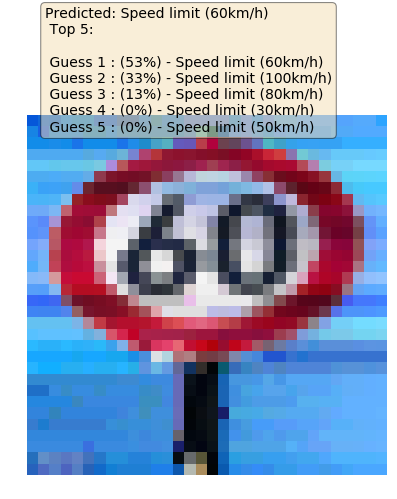

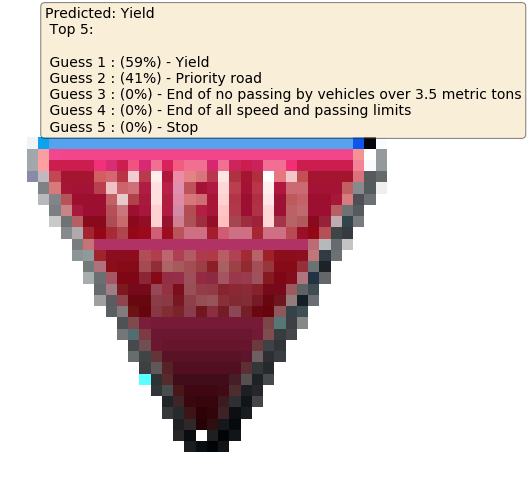

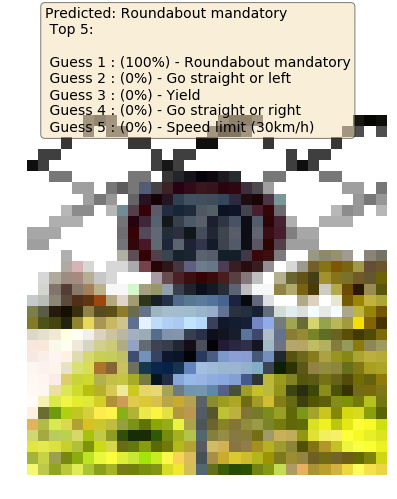

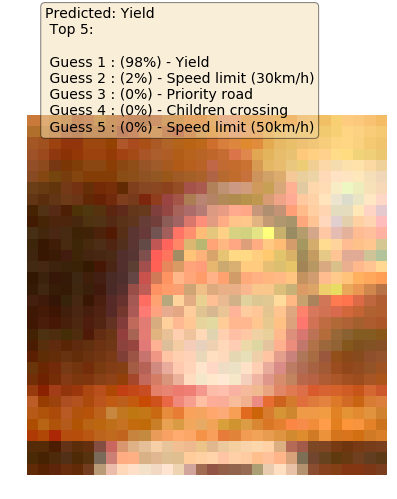

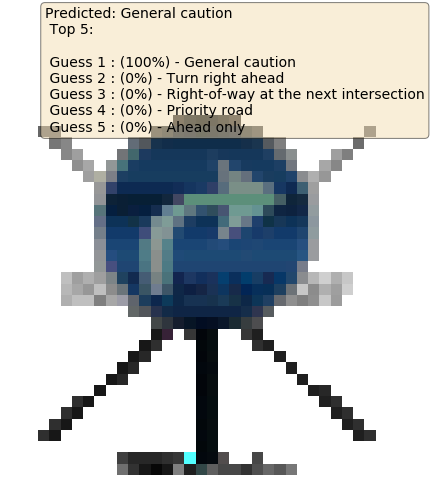

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import os, sys
import numpy as np
from PIL import Image
import warnings
from skimage import exposure

def predictNewImages(isNormalized=False):
    logit = None
    new_normalized_images = []
    k_size = 5
    softmax_logits = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(softmax_logits, k=k_size)

    for file in os.listdir('extra'):
    #       if (file.endswith(".png") or file.endswith(".jpg")):
            if file.endswith(".jpg"):
                im = mpimg.imread('extra/' + file)
                im = resize(im)
                if (isNormalized):
                    im = normalized_image(im)
                new_normalized_images.append(im)

    with tf.Session() as sess:
        loader = tf.train.import_meta_graph('./lenet.meta')
        loader.restore(sess, tf.train.latest_checkpoint('./'))
        sess = tf.get_default_session()

        logit = sess.run(tf.argmax(logits, 1), feed_dict={x:new_normalized_images})
        my_top_k = sess.run(top_k, feed_dict={x: new_normalized_images})

        print(logit)
        topkLabel = ""
        for idx, img in enumerate(new_normalized_images):
    #         print(idx)
    #         print()
    #         plt.hist(my_top_k.values[idx], 50, normed=1, facecolor='green', alpha=0.75)
            topkLabel = ""
            plt.show()

            for j in range(k_size):
                topkLabel = topkLabel + "\n Guess {} : ({:.0f}%) - {}".format(j+1, 100*my_top_k[0][idx][j], signClassForId(my_top_k[1][idx][j]))


            label = "Predicted: {} \n Top 5: \n {}".format(signClassForId(logit[idx]), topkLabel)
            plotAndShowImageWithLabel(img, label, size=(5,5))
#         print(topkLabel)

predictNewImages(True)

### Predict the Sign Type for Each Image  (non-normalized)

INFO:tensorflow:Restoring parameters from ./lenet
[16 18  3 40 14 40 11 12 40 15 40]


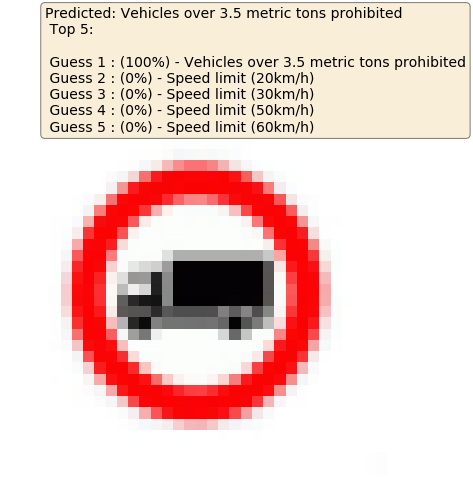

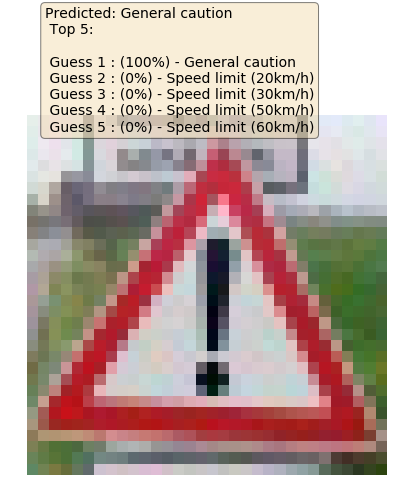

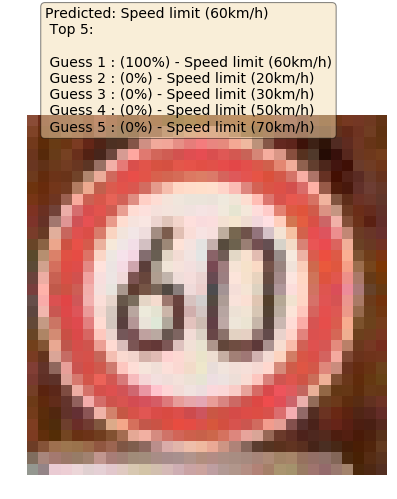

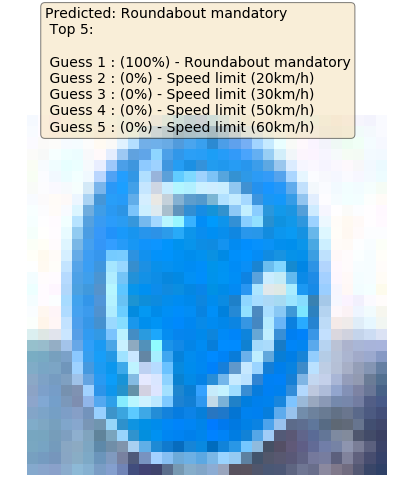

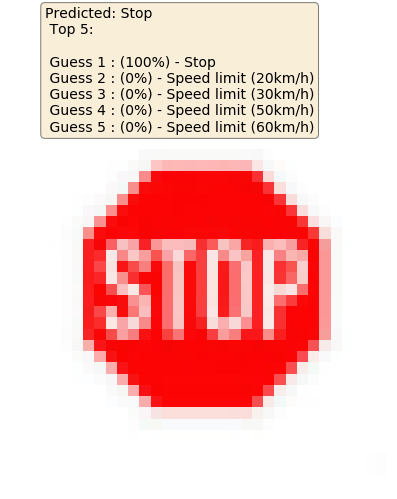

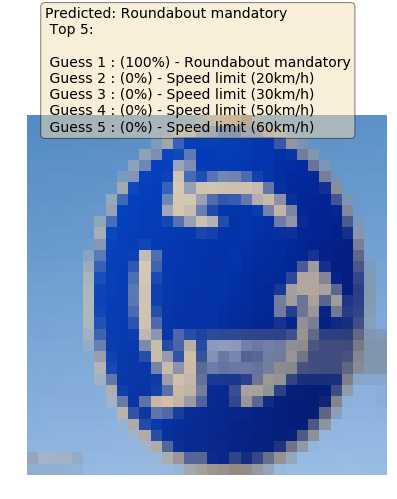

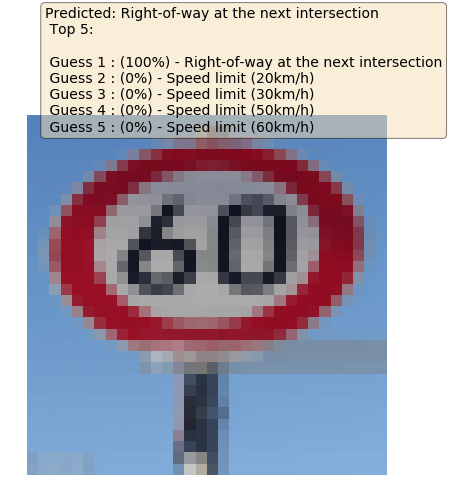

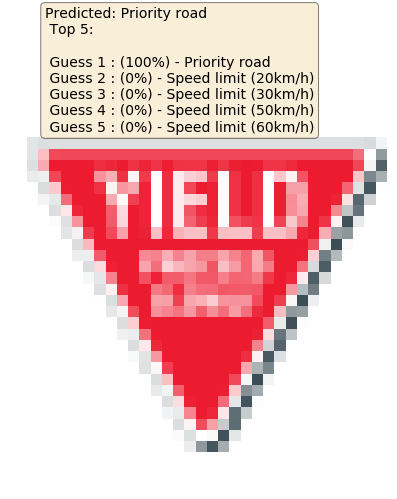

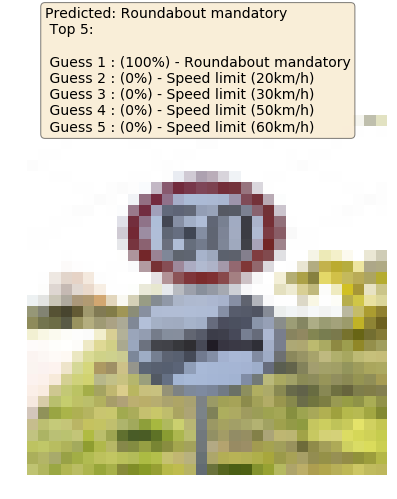

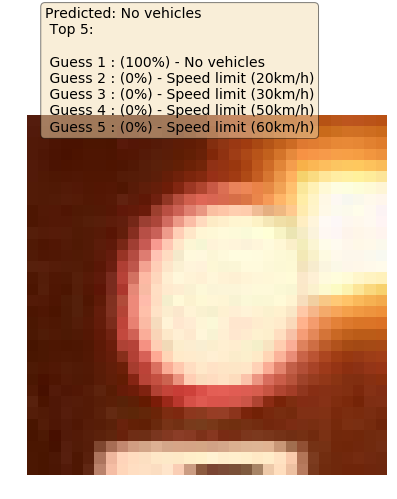

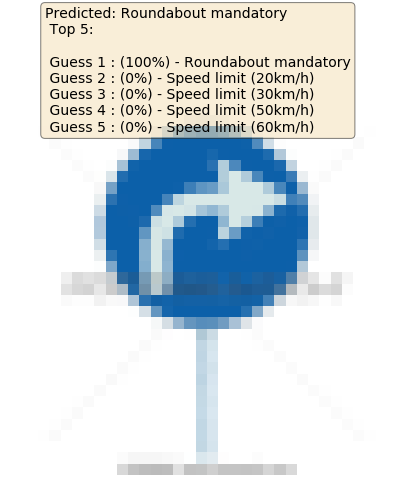

In [19]:
predictNewImages(isNormalized=False)


### Analyze Performance

# Question 7

Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.

NOTE: You could check the accuracy manually by using signnames.csv (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in signnames.csv and see if it matches the sign from the image.

**Answer:**

The model performed reasonably well on the new images when not normalized with **81%** accuracy. When applying the normalization process the results were much worse, **54%.**

I will say that some images were obtained from Google images and could be considered tricky given the images used during training.  One of them had 2 different signs, another had watermark and sign pole and one of them I wasn't able to identify myself what kind of it is given the poor image quality. 

Results:
Normalized images - 6/11 = 54%
Non-Normalized images - 9/11 = 81%


# Question 8

Use the model's softmax probabilities to visualize the certainty of its predictions, tf.nn.top_k could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)

**Answer:**

I've noticed that with and without normalization (same process applied during training using -> histogram equalization) the results were different.  Without normalization the NN was always 100% confident of the results, even when they're completly wrong.  With normalization the softmax generated proper accuracy results and I was satified with the results since they're coherent for the most part. 


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
# TODO: plot confusion matrix

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [21]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")